# Logistic Regression

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score,f1_score,precision_score

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


# Null Value

In [4]:
# Check Null value
df.isnull().sum()/len(df) * 100

Churn              0.0
AccountWeeks       0.0
ContractRenewal    0.0
DataPlan           0.0
DataUsage          0.0
CustServCalls      0.0
DayMins            0.0
DayCalls           0.0
MonthlyCharge      0.0
OverageFee         0.0
RoamMins           0.0
dtype: float64

# Outlier Analysis

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


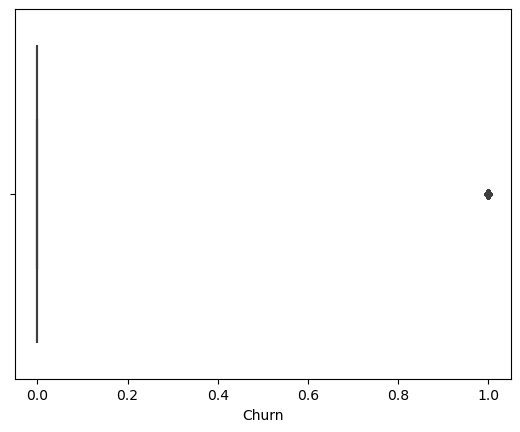

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


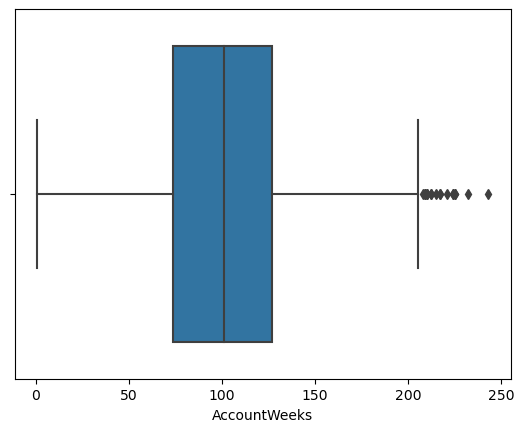

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


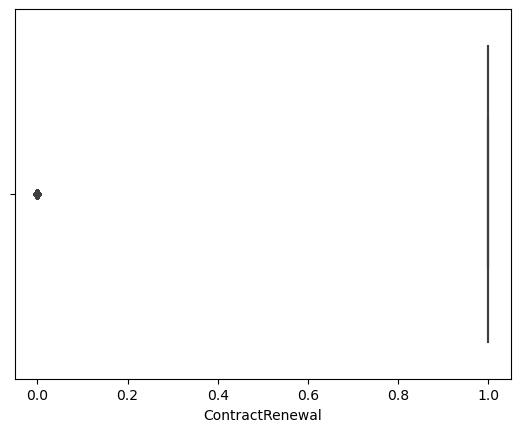

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


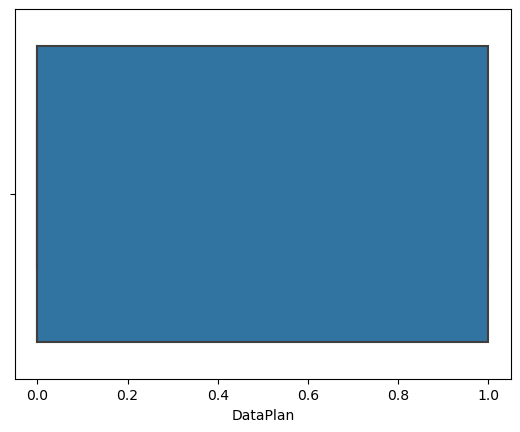

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


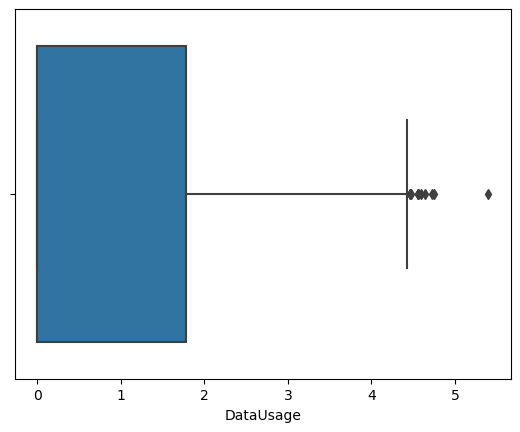

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


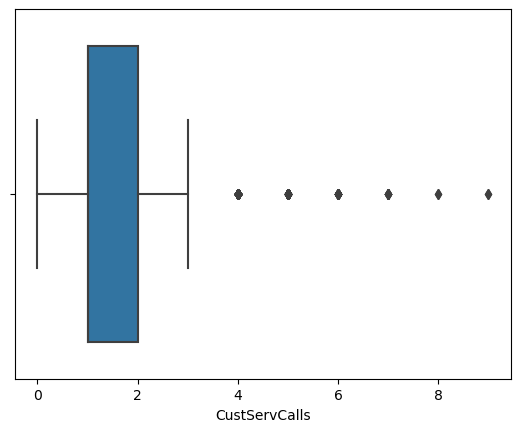

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


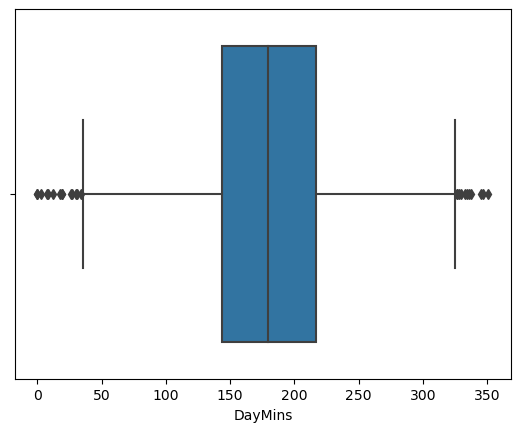

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


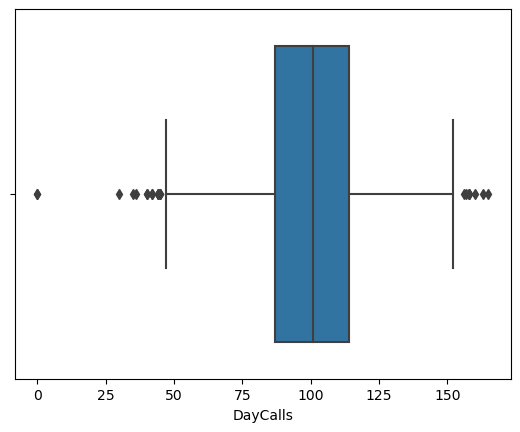

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


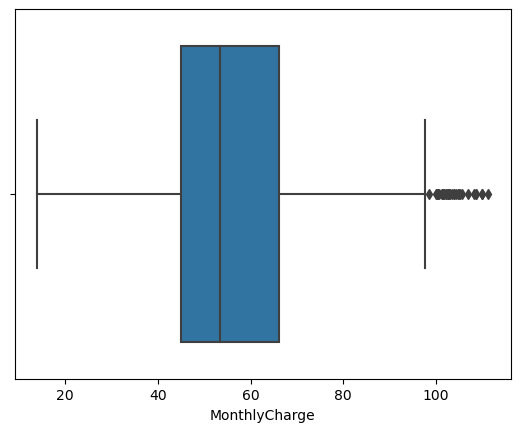

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


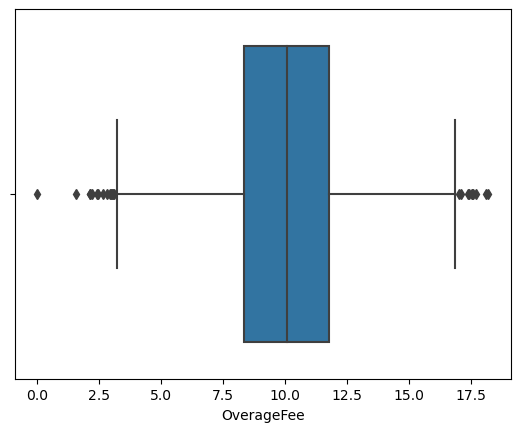

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


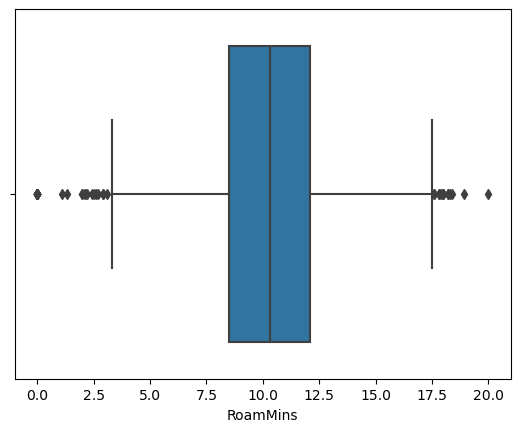

In [5]:
for column in df.columns:
    sns.boxplot(column, data=df)
    plt.show()

In [6]:
# There are outliers in AccountWeeks, DataUasage, CustServCalls,DayMins, DayCalls, MonthlyCharge, OverageFee, and RoamMins. 

In [7]:
# # Remove Outlier Analysis
# # Flooring and Capping

# for column in df.columns:
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     ll = q1 - (1.5 * iqr)
#     ul = q3 + (1.5 * iqr)
#     #print(column,ll,ul)
#     for index in df[column].index:
#         #print(df.loc[index,column])
#         if df.loc[index,column]>ul:
#             df.loc[index,column]=ul
#         if df.loc[index,column]<ll:
#             df.loc[index,column]=ll

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


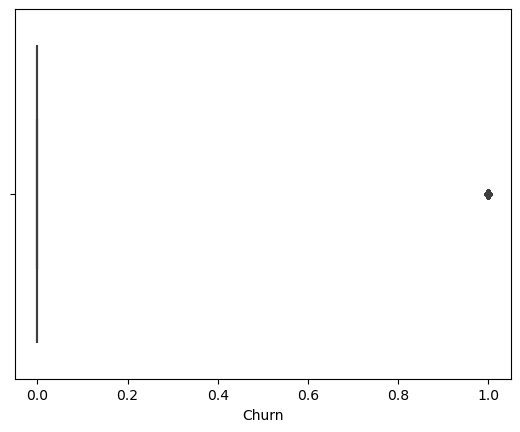

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


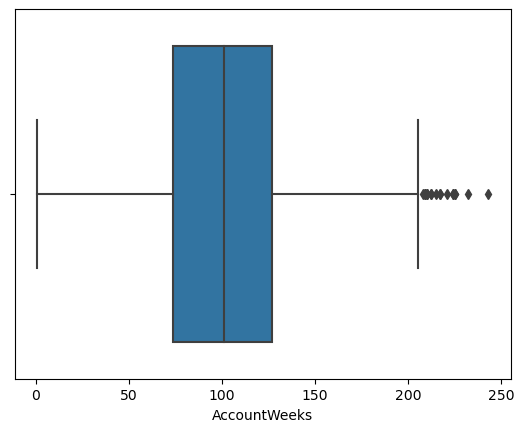

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


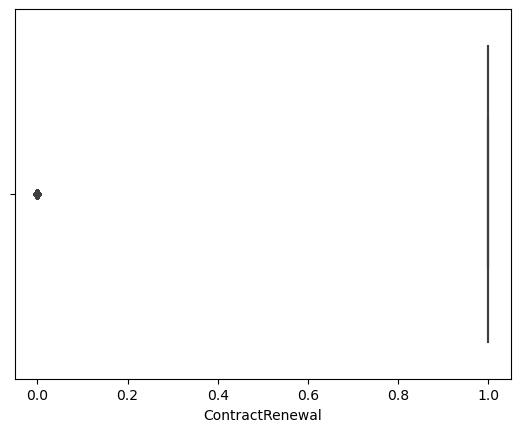

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


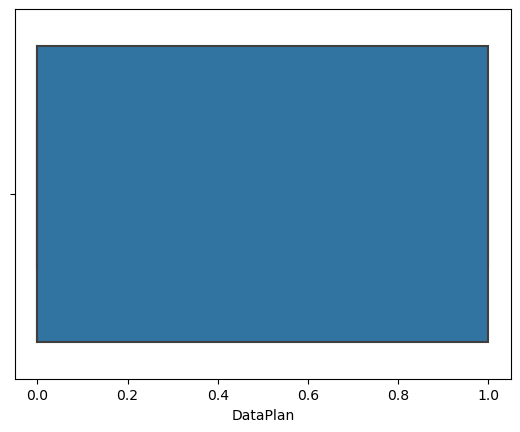

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


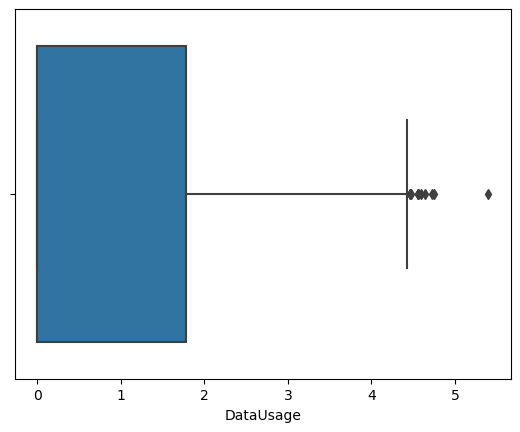

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


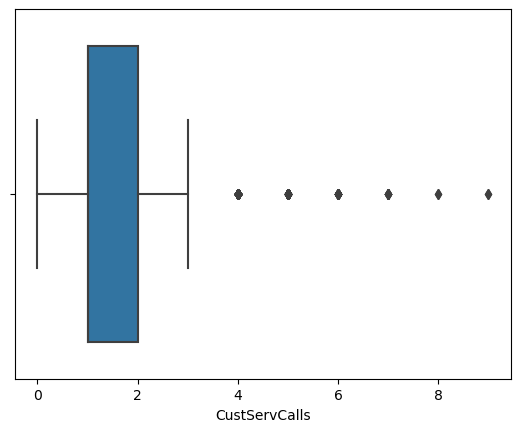

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


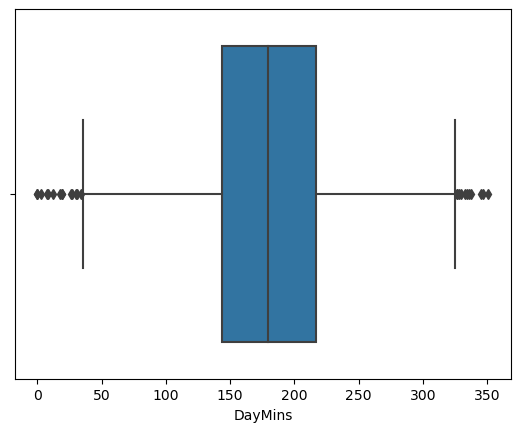

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


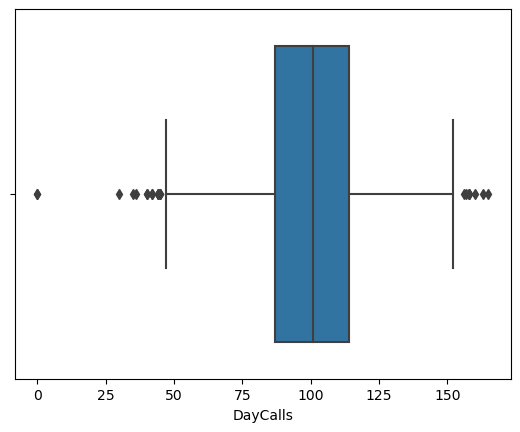

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


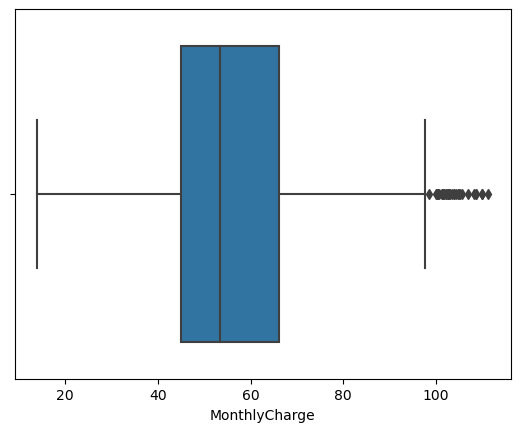

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


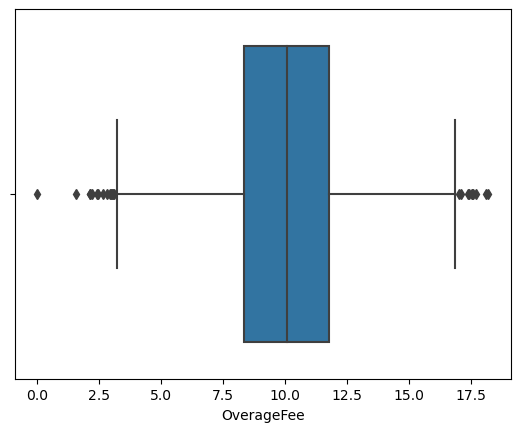

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


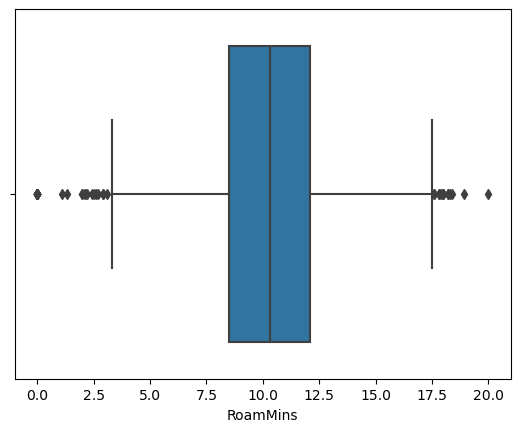

In [8]:
for column in df.columns:
    sns.boxplot(column, data=df)
    plt.show()

# EDA 

In [9]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [11]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Churn
[0 1]
AccountWeeks
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
ContractRenewal
[1 0]
DataPlan
[1 0]
DataUsage
[2.7  3.7  0.   2.03 0.19 3.02 0.29 0.34 0.44 3.73 0.31 0.39 2.57 0

In [13]:
cont_cols = ['AccountWeeks','OverageFee','RoamMins']
cat_cols = list(set(df.columns) - set(cont_cols))
print("Continuous variables: ", cont_cols)
print("Categorical variables: ", cat_cols)

Continuous variables:  ['AccountWeeks', 'OverageFee', 'RoamMins']
Categorical variables:  ['DataPlan', 'Churn', 'MonthlyCharge', 'CustServCalls', 'DayMins', 'DayCalls', 'ContractRenewal', 'DataUsage']


<b> Univariate Anlaysis  </b>

In [14]:
# Continuous Data - Histogram or KDE

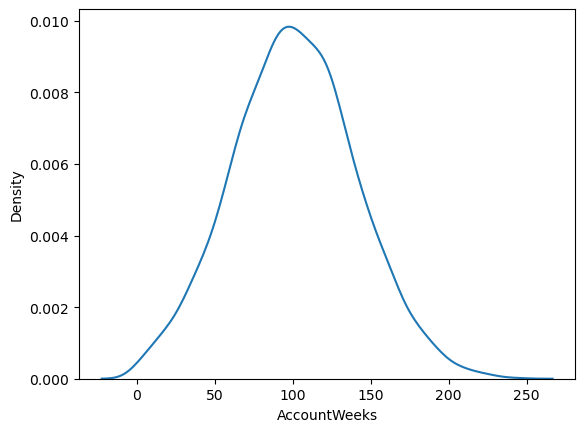

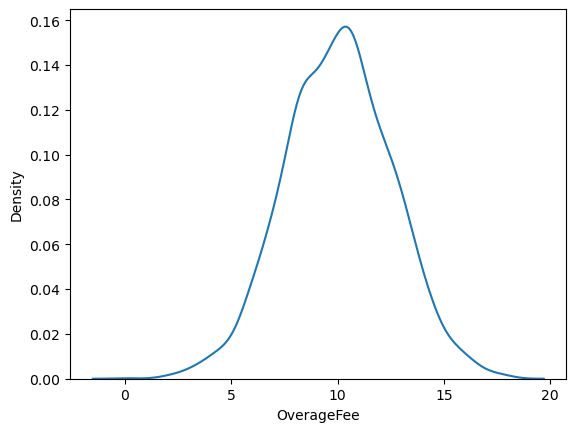

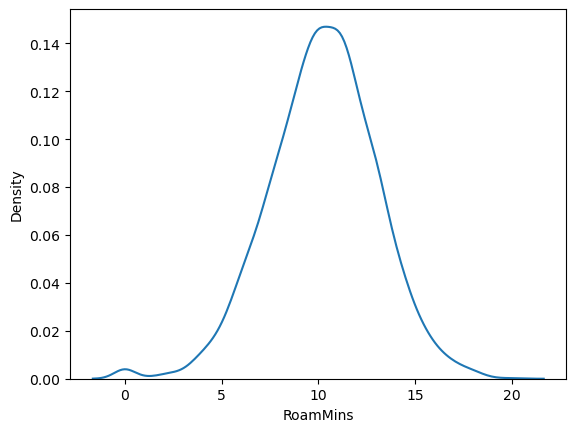

In [15]:
for col in cont_cols:
    sns.kdeplot(col,data=df)
    plt.show()

In [16]:
for col in cont_cols:
    print(col, ": " , df[col].skew())

AccountWeeks :  0.09660629423135147
OverageFee :  -0.02384534080984628
RoamMins :  -0.2451359394861856


In [17]:
# AccountWeeks, OverageFee and RoamMins are closer to uniform distribution - closer to 0

In [18]:
# Categorical Data - Bar graphs

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


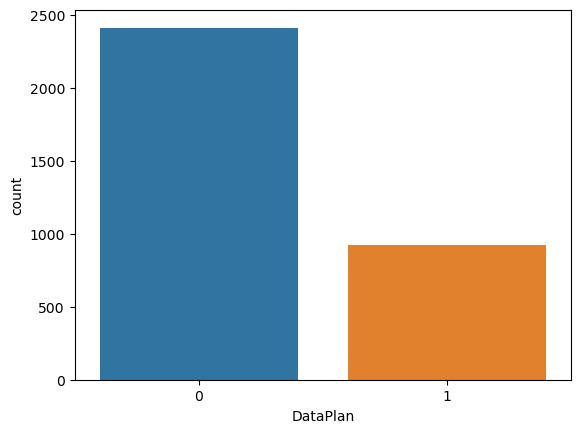

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


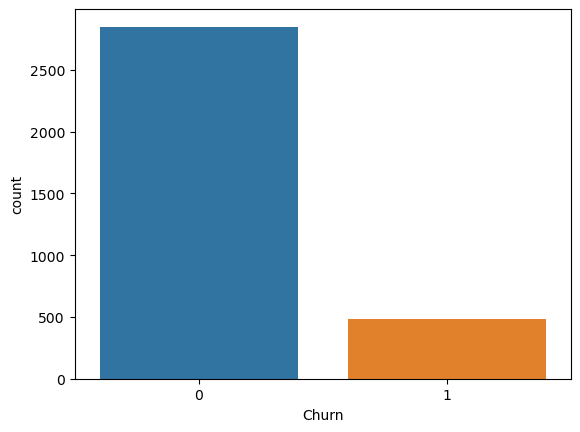

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


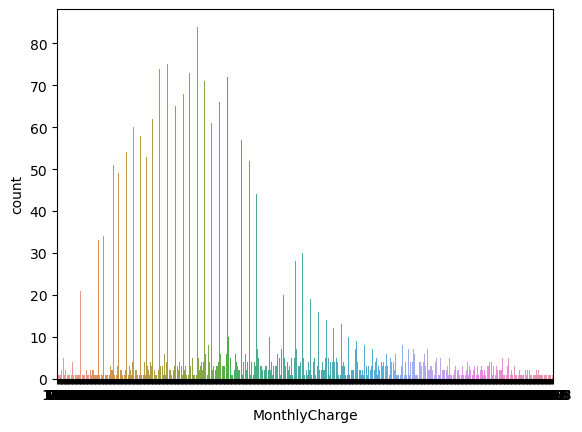

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


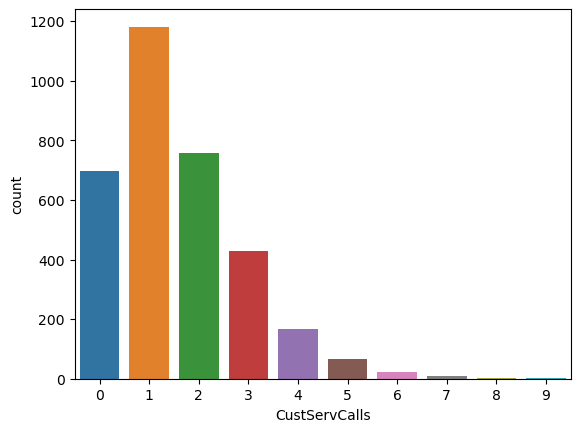

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


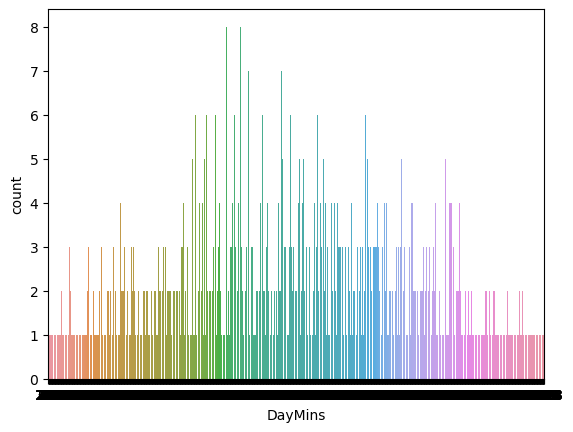

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


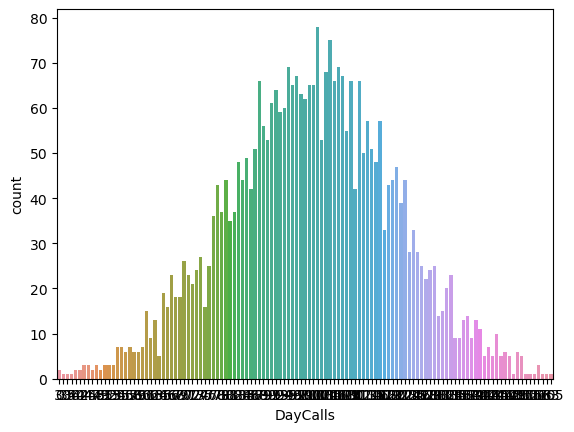

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


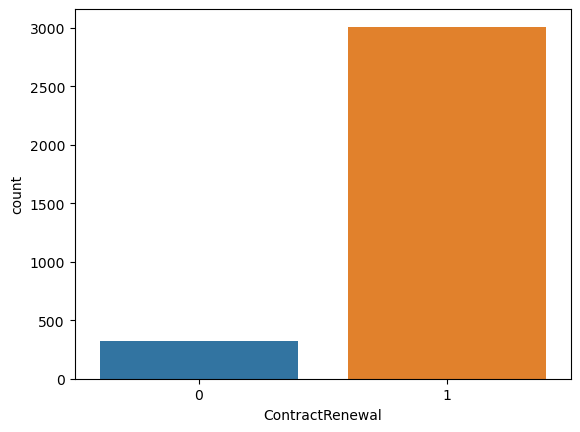

C:\Users\Bhakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


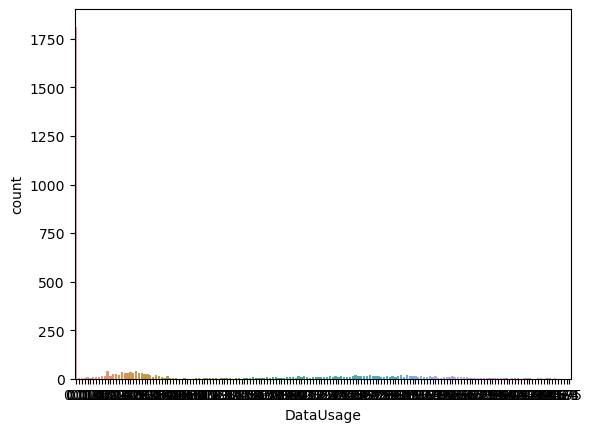

In [19]:
#plt.figure(figsize=(5,5))
for col in cat_cols:
    sns.countplot(col,data=df)
    plt.show()

In [20]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize=True).round(2))

Churn
0    0.86
1    0.14
Name: Churn, dtype: float64
AccountWeeks
105    0.01
87     0.01
101    0.01
93     0.01
90     0.01
       ... 
243    0.00
200    0.00
232    0.00
5      0.00
221    0.00
Name: AccountWeeks, Length: 212, dtype: float64
ContractRenewal
1    0.9
0    0.1
Name: ContractRenewal, dtype: float64
DataPlan
0    0.72
1    0.28
Name: DataPlan, dtype: float64
DataUsage
0.00    0.54
0.31    0.01
0.21    0.01
0.29    0.01
0.26    0.01
        ... 
5.40    0.00
4.40    0.00
4.73    0.00
4.64    0.00
0.68    0.00
Name: DataUsage, Length: 174, dtype: float64
CustServCalls
1    0.35
2    0.23
0    0.21
3    0.13
4    0.05
5    0.02
6    0.01
7    0.00
9    0.00
8    0.00
Name: CustServCalls, dtype: float64
DayMins
154.0    0.0
159.5    0.0
174.5    0.0
183.4    0.0
175.4    0.0
        ... 
78.6     0.0
200.9    0.0
254.3    0.0
247.0    0.0
180.8    0.0
Name: DayMins, Length: 1667, dtype: float64
DayCalls
102    0.02
105    0.02
95     0.02
107    0.02
104    0.02
       ..

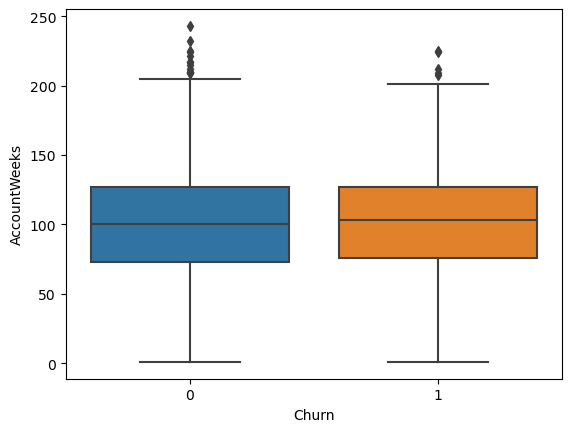

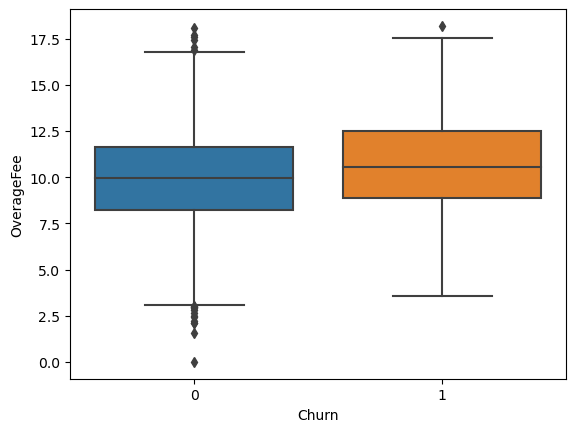

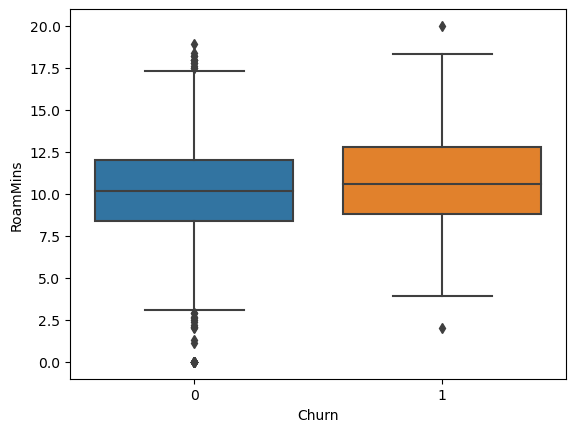

In [21]:
for col in cont_cols:
    sns.boxplot(x='Churn',y=col,data=df)
    plt.show()

In [22]:
# AccountWeeks, OverageFee and RoamMins has no impact on defaulter

In [23]:
# Target vs Categorical data

# Categorical vs Categorical data

# Stacked bar plot

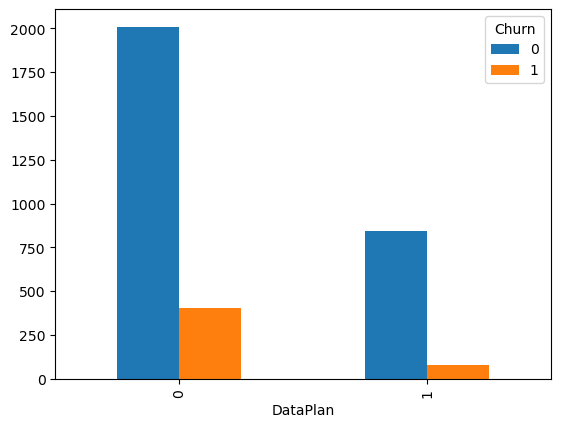

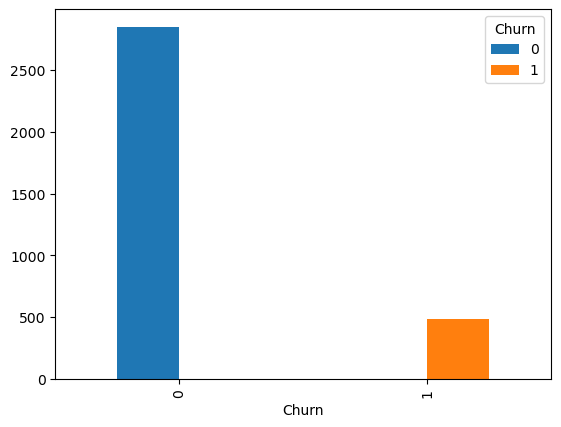

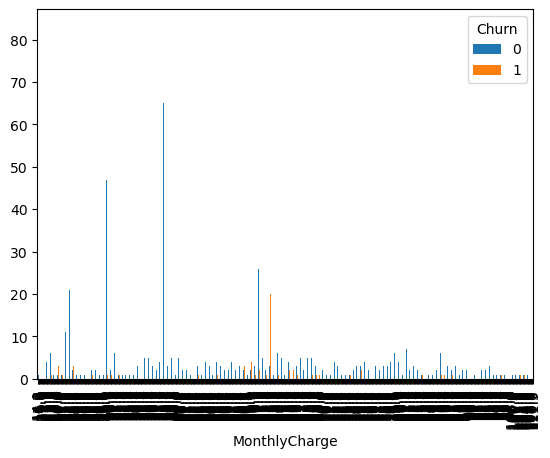

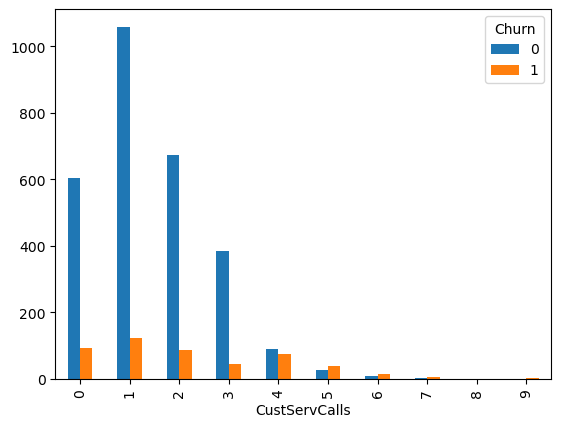

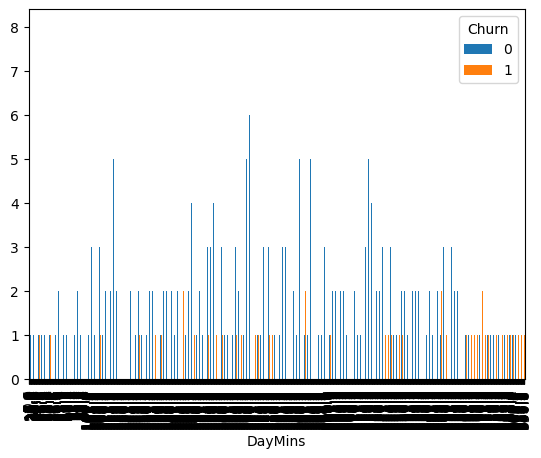

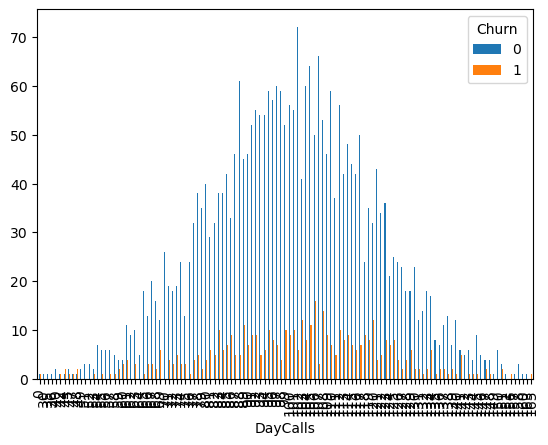

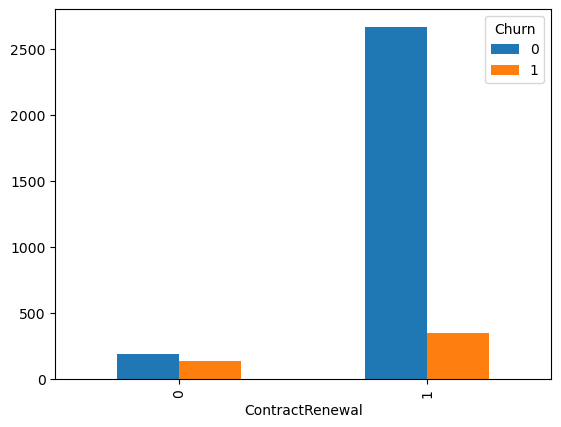

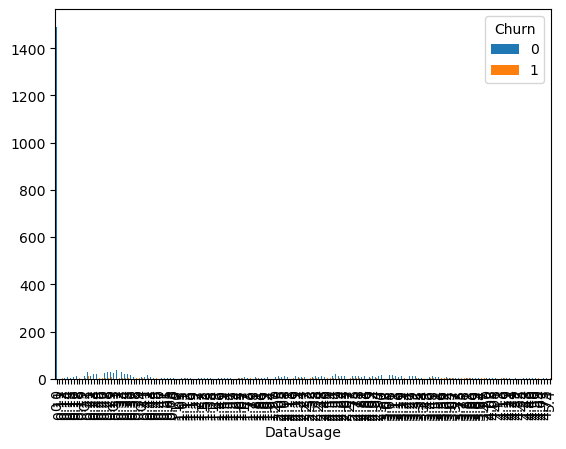

In [24]:
for col in cat_cols:
    pd.crosstab(df[col],df['Churn']).plot(kind='bar')
    plt.show()

In [25]:
# Contract Renewal 1 an Data plan 0 are having more churn counts

# Scaling

In [26]:
# Scaling - Continuous data

In [27]:
# from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()
x_con_scaled = pd.DataFrame(ss.fit_transform(df[cont_cols]), columns=cont_cols,index=df.index)
x_con_scaled.head()

,AccountWeeks,OverageFee,RoamMins
0,0.676489,-0.071584,-0.085008
1,0.149065,-0.107082,1.240482
2,0.902529,-1.574346,0.703121
3,-0.428590,-2.741846,-1.303026
4,-0.654629,-1.037927,-0.049184


In [29]:
ss = StandardScaler()
x_cat_scaled = pd.DataFrame(ss.fit_transform(df[cat_cols]), columns=cat_cols, index=df.index)
x_cat_scaled.head()

,DataPlan,Churn,MonthlyCharge,CustServCalls,DayMins,DayCalls,ContractRenewal,DataUsage
0,1.617086,-0.411672,1.990727,-0.427932,1.566767,0.476643,0.327580,1.480204
1,1.617086,-0.411672,1.564510,-0.427932,-0.333738,1.124503,0.327580,2.266072
2,-0.618396,-0.411672,-0.262133,-1.188218,1.168304,0.675985,0.327580,-0.641642
3,-0.618396,-0.411672,0.042307,0.332354,2.196596,-1.466936,-3.052685,-0.641642
4,-0.618396,-0.411672,-0.931902,1.092641,-0.240090,0.626149,-3.052685,-0.641642


# Encoding

In [30]:
# Categorical data - Numerical Data

# One hot encoding

In [31]:
x_cal_enc = pd.get_dummies(df[cat_cols],drop_first=True) # function to execute one hot encoding 
x_cal_enc.head()

,DataPlan,Churn,MonthlyCharge,CustServCalls,DayMins,DayCalls,ContractRenewal,DataUsage
0,1,0,89.0,1,265.1,110,1,2.7
1,1,0,82.0,1,161.6,123,1,3.7
2,0,0,52.0,0,243.4,114,1,0.0
3,0,0,57.0,2,299.4,71,0,0.0
4,0,0,41.0,3,166.7,113,0,0.0


# Marge Cat and Con Data

In [32]:
x_final = pd.concat([x_con_scaled,x_cal_enc],axis=1)
x_final

,AccountWeeks,OverageFee,RoamMins,DataPlan,Churn,MonthlyCharge,CustServCalls,DayMins,DayCalls,ContractRenewal,DataUsage
0,0.676489,-0.071584,-0.085008,1,0,89.0,1,265.1,110,1,2.70
1,0.149065,-0.107082,1.240482,1,0,82.0,1,161.6,123,1,3.70
2,0.902529,-1.574346,0.703121,0,0,52.0,0,243.4,114,1,0.00
3,-0.428590,-2.741846,-1.303026,0,0,57.0,2,299.4,71,0,0.00
4,-0.654629,-1.037927,-0.049184,0,0,41.0,3,166.7,113,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,0.287344,-0.120832,1,0,71.7,2,156.2,77,1,2.67
3329,-0.830437,-0.939320,-0.228304,0,0,56.4,3,231.1,57,1,0.34
3330,-1.835055,1.730942,1.383778,0,0,56.0,2,180.8,109,1,0.00
3331,2.082955,-0.817048,-1.876211,0,0,50.0,2,213.8,105,0,0.00


# Train Test Split

In [33]:
#from sklearn.model_selection import train_test_split

In [34]:
y = df['Churn']

In [35]:
# Training = 80%, Testing = 20% ( Random Selection of train_test_split)

In [36]:
x_train,x_test, y_train,y_test = train_test_split(x_final,y,test_size = 0.2, random_state=10)

# Logistic Regression Model

In [37]:
# from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression(penalty='l2',C=1.0, class_weight='balanced',fit_intercept=True)
log_reg.fit(x_train,y_train)

C:\Users\Bhakti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [39]:
print('Intercept (b0): ', log_reg.intercept_)
print('Coerricients (b1): ', log_reg.coef_[0])

Intercept (b0):  [-0.81760411]
Coerricients (b1):  [ 2.49149859e-01  6.59749187e-01 -8.79620597e-03  1.39723701e-01
  9.54496097e+00 -1.19920347e-01  1.90820777e-01  2.25580092e-02
 -1.24384552e-02 -1.40093486e+00  9.14946698e-01]


# Performance Metrics

In [40]:
y_test_pred = log_reg.predict(x_test)

In [41]:
#from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

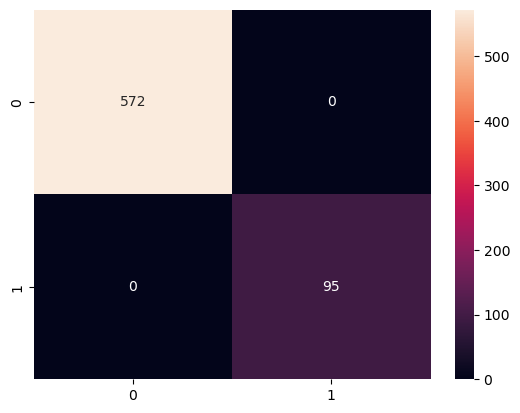

In [42]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt="0.0f")

In [43]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       1.00      1.00      1.00        95

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



# ROC Curve

In [ ]:
#from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
y_test_pred_prob = log_reg.predict_proba(x_test)[:,1]
fpr,tpr,thresh = roc_curve(y_test,y_test_pred_prob,drop_intermediate=True) #Y_actual , Y_predict_Probability
roc_df = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thresh})
roc_df

,TPR,FPR,Threshold
0,0.000000,0.0,1.998833
1,0.010526,0.0,0.998833
2,1.000000,0.0,0.979139
3,1.000000,1.0,0.001180


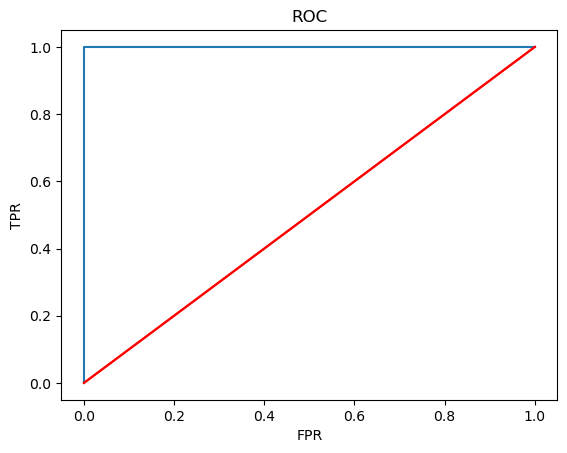

In [53]:
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(roc_df['FPR'],roc_df['TPR'])
plt.plot([[0,0],[1,1]],color='red')
plt.show()

In [54]:
print('ROC_AUC:',roc_auc_score(y_test,y_test_pred_prob))

ROC_AUC: 1.0


# Train & Test Score

In [44]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

Train Confusion Matrix: 


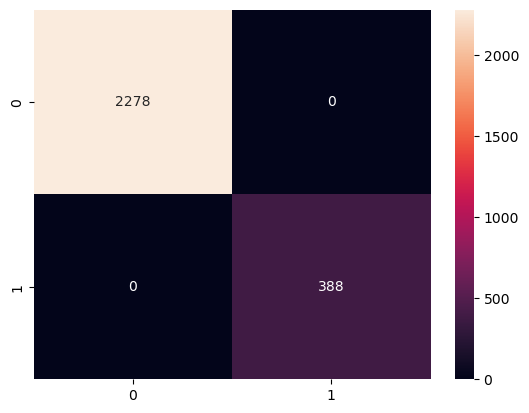

Test Confusion Matrix: 


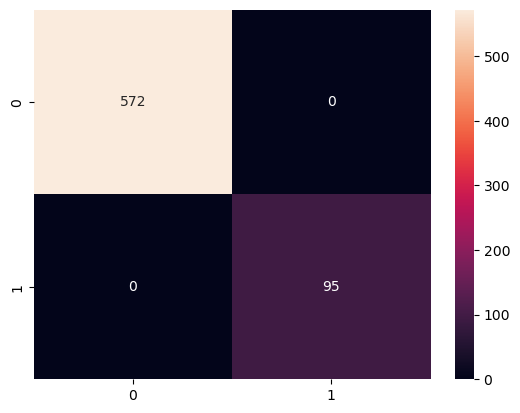

In [45]:
print('Train Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True, fmt='0.0f')
plt.show()
print('Test Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='0.0f')
plt.show()

In [46]:
print('Train Classification Report: ')
print(classification_report(y_train,y_train_pred))
print('-'*70)
print('Test Classification Report: ')
print(classification_report(y_test,y_test_pred))


Train Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      1.00      1.00       388

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666

----------------------------------------------------------------------
Test Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       1.00      1.00      1.00        95

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



In [55]:
y_train_pred_prod=log_reg.predict_proba(x_train)[:,1]
y_test_pred_prod=log_reg.predict_proba(x_test)[:,1]

In [56]:
print('Train ROC: ',roc_auc_score(y_train,y_train_pred_prod))
print('Test ROC: ',roc_auc_score(y_test,y_test_pred_prod))

Train ROC:  1.0
Test ROC:  1.0


# Cross Validation Score

In [47]:
# from sklearn.model_selection import cross_val_score

In [48]:
scores = cross_val_score(log_reg,x_train,y_train,scoring='recall',cv=5)

C:\Users\Bhakti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhakti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [49]:
print('Score: ',scores)
print('Avg Score: ',np.mean(scores))
print('Std Score:', np.std(scores))

Score:  [1. 1. 1. 1. 1.]
Avg Score:  1.0
Std Score: 0.0


In [50]:
# Model is having constant performance in all the splits

# Finding model threshold by ROC

In [58]:
roc_df

,TPR,FPR,Threshold
0,0.000000,0.0,1.998833
1,0.010526,0.0,0.998833
2,1.000000,0.0,0.979139
3,1.000000,1.0,0.001180


In [60]:
roc_df['Difference'] = roc_df['TPR'] - roc_df['FPR']
roc_df[roc_df['Difference'] == max(roc_df['Difference'])]

,TPR,FPR,Threshold,Difference
2,1.0,0.0,0.979139,1.0


# Choosing threshold by a performance metric

In [62]:
# from sklearn.metrics import recall_score,f1_score,precision_score

In [64]:
thresholds = np.arange(0,1.1,0.1)
recall_list = []
f1_list = []
precision_list = []
for th in thresholds:
    y_pred_class = [0 if pval < th else 1 for pval in y_test_pred_prob]
    recall_list.append(recall_score(y_test,y_pred_class))
    f1_list.append(f1_score(y_test,y_pred_class))
    precision_list.append(precision_score(y_test,y_pred_class))

C:\Users\Bhakti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


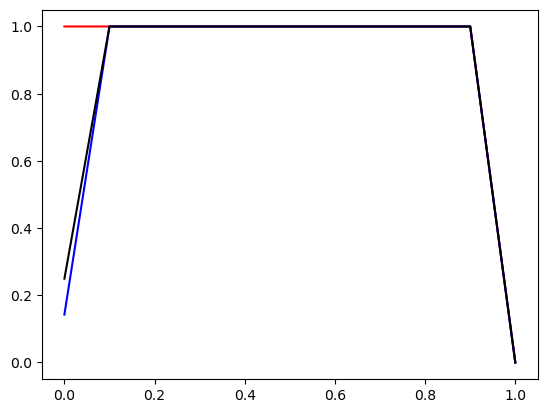

In [65]:
plt.plot(thresholds,recall_list,color='red')
plt.plot(thresholds,precision_list,color='blue')
plt.plot(thresholds,f1_list,color='black')